In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("trafficdensity.csv")

In [4]:
df.head()

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2021-05-01 17:00:00,29.042358,41.113586,sxk9uu,7,102,44,40
1,2021-05-01 19:00:00,28.580933,41.201477,sxk66k,48,93,77,29
2,2021-05-03 19:00:00,28.987427,41.108093,sxk9ge,10,110,47,54
3,2021-05-03 07:00:00,28.383179,41.075134,sxk1tv,62,163,95,72
4,2021-05-02 16:00:00,28.778687,41.212463,sxk6qy,8,86,39,38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121215 entries, 0 to 121214
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE_TIME           121215 non-null  object 
 1   LONGITUDE           121215 non-null  float64
 2   LATITUDE            121215 non-null  float64
 3   GEOHASH             121215 non-null  object 
 4   MINIMUM_SPEED       121215 non-null  int64  
 5   MAXIMUM_SPEED       121215 non-null  int64  
 6   AVERAGE_SPEED       121215 non-null  int64  
 7   NUMBER_OF_VEHICLES  121215 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 7.4+ MB


In [7]:
df.isnull().sum()

DATE_TIME             0
LONGITUDE             0
LATITUDE              0
GEOHASH               0
MINIMUM_SPEED         0
MAXIMUM_SPEED         0
AVERAGE_SPEED         0
NUMBER_OF_VEHICLES    0
dtype: int64

We can use geohashes and number of vehicles to determine traffic density.
We also keep longtitude and latitude values for axis.

In [9]:
densityDF = df[["LONGITUDE","LATITUDE","GEOHASH","NUMBER_OF_VEHICLES"]]

In [31]:
group = densityDF.groupby("GEOHASH")
#We will use mean to show density at this location.
countedGroup = group.mean()

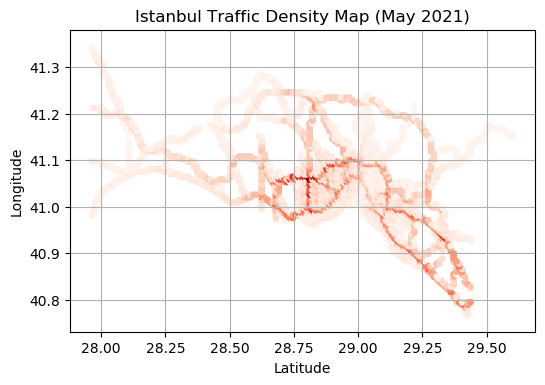

In [39]:
plt.figure(dpi=100)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Istanbul Traffic Density Map (May 2021)")
plt.scatter(countedGroup["LONGITUDE"], countedGroup["LATITUDE"],
            c=countedGroup["NUMBER_OF_VEHICLES"],s=15,cmap="Reds")
plt.savefig("trafficdensity.png")